# Avvistamenti negli anni

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/AvvistamentiNegliAnni'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [2]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [3]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])
counts = data['datetime'].dt.year.value_counts()
counts = counts[counts > 100]
counts = counts.sort_index()
counts.head()

1965    188
1966    193
1967    188
1968    220
1969    155
Name: datetime, dtype: int64

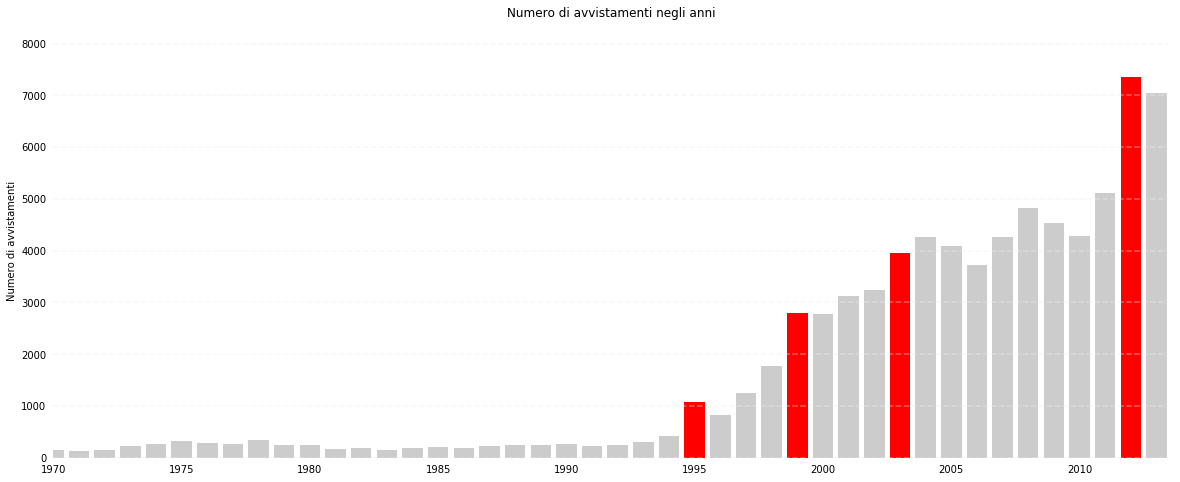

In [4]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

# Le barre non hanno label, non posso riconoscerle come faccio nello sparklines
# Allora specifico i colori singolarmente, ripetendo il grigio eccetto per la barra rossa
colors = ['#cccccc'] * len(counts.index)

find_index = lambda x: np.where(counts.index.values == x)[0][0]

for year in [1995, 1999, 2003, 2012]:
    colors[find_index(year)] = '#ff0000'

bars = plt.bar(counts.index, counts.values, color=colors)

ax.set_ylabel('Numero di avvistamenti')
ax.set_title('Numero di avvistamenti negli anni')

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

ax.set_xlim((1970, 2013.5))
    
plt.savefig(f'{OUT_FOLDER}/BarChart.png')
plt.show()